### Initialization

In [132]:
import eyelinkio
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading `edf` file with `eyelinkio`

In [6]:
# define path to data
edf_path = '/Users/Brenda/projects/visualEyes/data/538mtlP1.edf'

# read edf and print metadata
edf = eyelinkio.read_edf(edf_path)
print(edf)

loadEvents = 1
loadEvents = 1
<EDF | 538mtlP1.edf> 
  Version: EYELINK II 1 
  Eye: RIGHT_EYE 
  Pupil unit: PUPIL_AREA 
  Sampling frequency: 500.0 Hz 
  Calibrations: 1 
  Length: 227.566 seconds 



In [8]:
# inpsect structure of edf
edf.keys()

dict_keys(['info', 'discrete', 'times', 'samples'])

In [86]:
edf['info']

{'meas_date': datetime.datetime(2024, 7, 23, 10, 15, 2),
 'version': 'EYELINK II 1',
 'camera': 'EyeLink CL-OL HEAD Version 1.0 Sensor=BF8',
 'serial': 'CLO-ZBF20',
 'camera_config': 'ZBF20140.SCD',
 'sfreq': 500.0,
 'ps_units': 'PUPIL_AREA',
 'eye': 'RIGHT_EYE',
 'sample_fields': ['xpos', 'ypos', 'ps'],
 'edfapi_version': '4.2.1197.0 MacOS X   standalone Sep 27 2024',
 'screen_coords': array([1920, 1080]),
 'calibrations': [{'onset': 0.0,
   'eye': 'right',
   'validation': array([( 960., 540., 0.17,  10.9,   1.7),
          ( 960., 119., 0.75,  11.3, -46.8),
          ( 960., 960., 0.44,   7.1,  27.1),
          ( 288., 540., 0.6 , -25.9,  28.3),
          (1631., 540., 0.61,  12.5,  37.3)],
         dtype=[('point_x', '<f8'), ('point_y', '<f8'), ('offset', '<f8'), ('diff_x', '<f8'), ('diff_y', '<f8')]),
   'model': 'HV5'}],
 'filename': '538mtlP1.edf'}

### `edf['discrete']`

In [ ]:
edf['discrete'].keys()

# edf['discrete']['messages']: time, message
# edf['discrete']['buttons']: time, button
# edf['discrete']['inputs']: time, input

dict_keys(['messages', 'buttons', 'inputs', 'fixations', 'blinks', 'saccades'])

In [ ]:
# inspect fixation data structure
edf['discrete']['fixations'][0] # first fixation
# structure: eye (1=right eye), start time, end time, average x, average y

(1., 0.004, 0.074, 981.40002441, 206.1000061)

In [ ]:
# inspect blink data structure
edf['discrete']['blinks'][0] # first blink
# structure: eye (1=right eye), start time, end time

(1., 0.196, 0.41)

In [ ]:
# inspect saccade data structure
edf['discrete']['saccades'][0] # first saccade
# structure: eye, start time, end time, gaze start x, gaze start y, gaze end x, gaze end y, peak velocity (unit?)

(1., 0.076, 0.608, 973.79998779, 199.3999939, 1032., 47.90000153, 2726.5)


### convert `edf` to `pandas` `df`

In [108]:
df = edf.to_pandas()
df.keys()

dict_keys(['discrete', 'samples', 'calibrations'])

In [109]:
df['samples'].head() #x, y, pupil size

,xpos,ypos,ps
0,989.299988,207.800003,1941.0
1,989.700012,207.800003,1942.0
2,989.400024,207.899994,1943.0
3,989.200012,207.600006,1942.0
4,989.000000,207.199997,1942.0


In [110]:
# edf['samples'] contain all samples that were recorded during the session 
# to prove that:
num_samples = edf['samples'].shape[1]
sample_freq = edf['info']['sfreq']
time = num_samples / sample_freq # time should be close/equal to the duration of the session
print(time, edf['times'][-1])

227.566 227.564


In [111]:
df['calibrations']

,point_x,point_y,offset,diff_x,diff_y,eye,model,onset
0,960.0,540.0,0.17,10.9,1.7,right,HV5,0.0
1,960.0,119.0,0.75,11.3,-46.8,right,HV5,0.0
2,960.0,960.0,0.44,7.1,27.1,right,HV5,0.0
3,288.0,540.0,0.60,-25.9,28.3,right,HV5,0.0
4,1631.0,540.0,0.61,12.5,37.3,right,HV5,0.0


In [112]:
df['discrete']['messages'].head()

,stime,msg
0,0.0,DISPLAY_COORDS 0 0 1919 1079
1,0.0,"!CAL \n>>>>>>> CALIBRATION (HV5,P-CR) FOR RIGH..."
2,0.0,!CAL Calibration points:
3,0.0,"!CAL 10.4, -40.3 -0, 103"
4,0.0,"!CAL 11.5, -53.6 -0, -1655"


In [113]:
df['discrete']['buttons'].head()

,stime,buttons
0,0.000,0.0
1,0.000,0.0
2,0.000,0.0
3,0.000,0.0
4,227.564,0.0


In [114]:
df['discrete']['inputs'].head()

,stime,input
0,0.000,127.0
1,0.000,127.0
2,0.000,127.0
3,0.000,127.0
4,227.564,127.0


In [115]:
df['discrete']['fixations'].head()

,eye,stime,etime,axp,ayp
0,RIGHT_EYE,0.004,0.074,981.400024,206.100006
1,RIGHT_EYE,0.610,0.658,1032.400024,42.299999
2,RIGHT_EYE,0.672,0.742,1016.299988,98.000000
3,RIGHT_EYE,0.788,1.042,884.200012,281.299988
4,RIGHT_EYE,1.074,1.336,964.900024,359.600006


In [116]:
df['discrete']['blinks'].head()

,eye,stime,etime
0,RIGHT_EYE,0.196,0.410
1,RIGHT_EYE,5.926,6.282
2,RIGHT_EYE,6.904,7.932
3,RIGHT_EYE,8.594,8.734
4,RIGHT_EYE,9.300,9.662


In [117]:
df['discrete']['saccades'].head()

,eye,stime,etime,sxp,syp,exp,eyp,pv
0,RIGHT_EYE,0.076,0.608,973.799988,199.399994,1032.000000,47.900002,2726.500000
1,RIGHT_EYE,0.660,0.670,1032.300049,39.200001,1029.400024,56.400002,39.799999
2,RIGHT_EYE,0.744,0.786,1013.900024,113.900002,865.500000,260.899994,154.699997
3,RIGHT_EYE,1.044,1.072,896.000000,286.899994,961.599976,341.799988,76.500000
4,RIGHT_EYE,1.338,1.380,971.700012,374.399994,1087.900024,576.500000,141.699997


### example: average data sampled every second and plot hetamap

In [157]:
# data wrangling
data = df['samples'].copy()
data['time'] = edf['times']
data.head()

,xpos,ypos,ps,time
0,989.299988,207.800003,1941.0,0.000
1,989.700012,207.800003,1942.0,0.002
2,989.400024,207.899994,1943.0,0.004
3,989.200012,207.600006,1942.0,0.006
4,989.000000,207.199997,1942.0,0.008


In [158]:
# convert time to integer to represent each second
data['time_sec'] = data['time'].astype(int) # always rounding down

# group by time_sec and calculate the mean for 'xpos', 'ypos', 'pupil'
data_grouped = data.groupby('time_sec')[['xpos', 'ypos', 'ps']].mean().reset_index()
data_grouped = data_grouped.dropna()
data_grouped.head()

,time_sec,xpos,ypos,ps
0,0,942.861990,356.642092,1468.608
1,1,1039.372600,510.348400,2380.128
2,2,1248.172801,1025.724801,3004.118
3,3,786.496401,378.939000,1697.684
4,4,901.710799,437.836400,1743.234


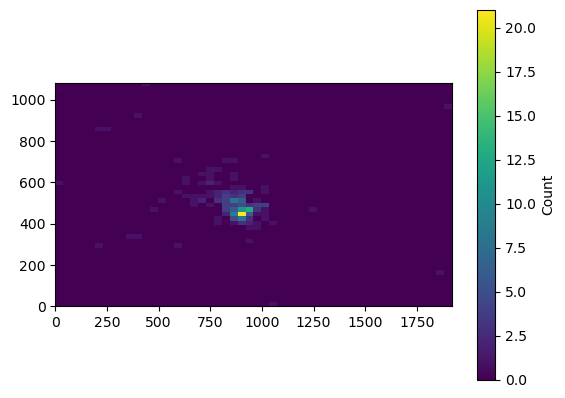

In [159]:
# create 2D array for x and y positions
heatmap, xedges, yedges = np.histogram2d(data_grouped['xpos'], data_grouped['ypos'], bins=50)
screen_coords = edf['info']['screen_coords']

# Plot the heatmap using imshow
plt.imshow(heatmap.T, origin='lower', cmap='viridis',
           extent=[0, screen_coords[0], 0, screen_coords[1]])
plt.colorbar(label='Count')

# note: the heatmap is not corrected with calibration info